In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
all_df = [train, test]

In [4]:
anscombe = sns.load_dataset("anscombe")
anscombe.shape

(44, 3)

In [5]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


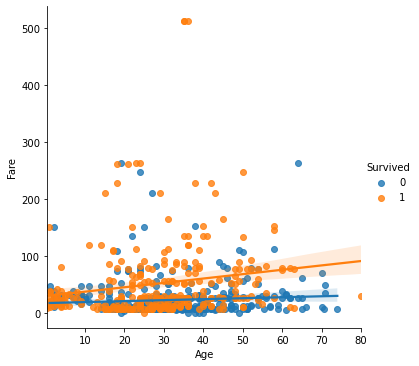

In [6]:
sns.lmplot(x="Age", y="Fare", data=train, hue="Survived")

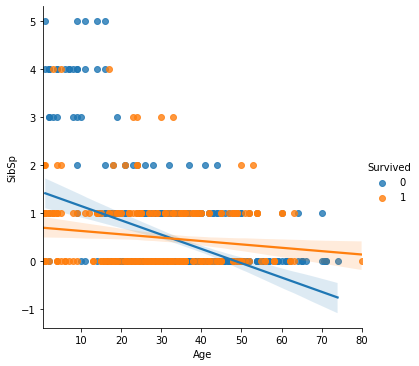

In [7]:
sns.lmplot(x="Age", y="SibSp", data=train, hue="Survived")

In [8]:
train[train["Fare"] >= 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [9]:
train.loc[train["Fare"] >=400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


(687, 12)


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

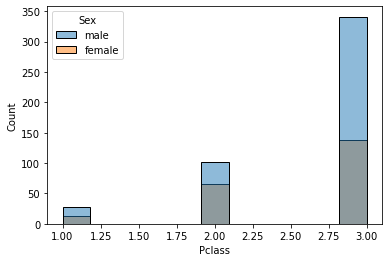

In [10]:
# Cabin 값이 없는 승객들의 Pclass는 어떠할까?

cabin_nan = train[train["Cabin"].isnull()]
print(cabin_nan.shape)
sns.histplot(data=cabin_nan, x="Pclass", hue="Sex")

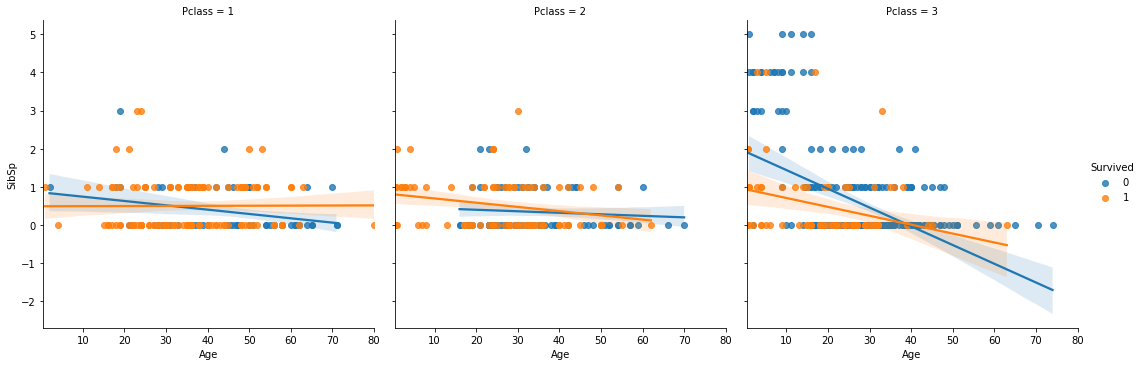

In [11]:
sns.lmplot(x="Age", y="SibSp", data=train, hue="Survived", col="Pclass", col_wrap=3)

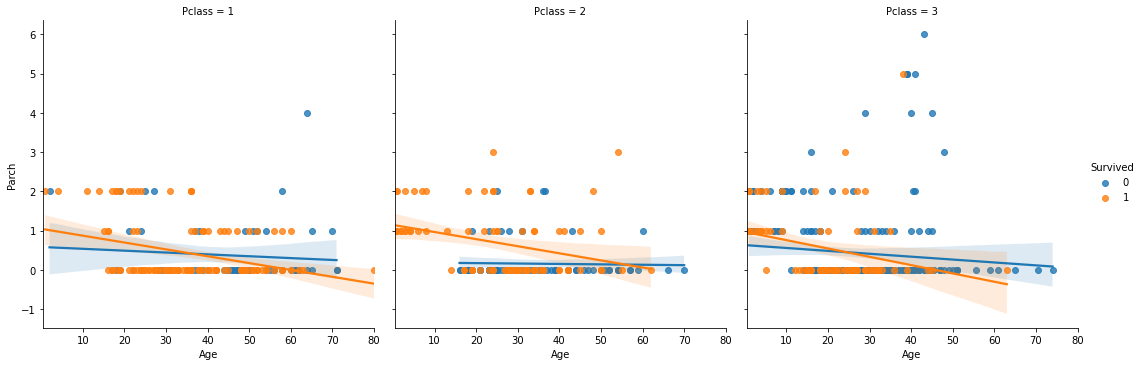

In [12]:
sns.lmplot(x="Age", y="Parch", data=train, hue="Survived", col="Pclass", col_wrap=3)

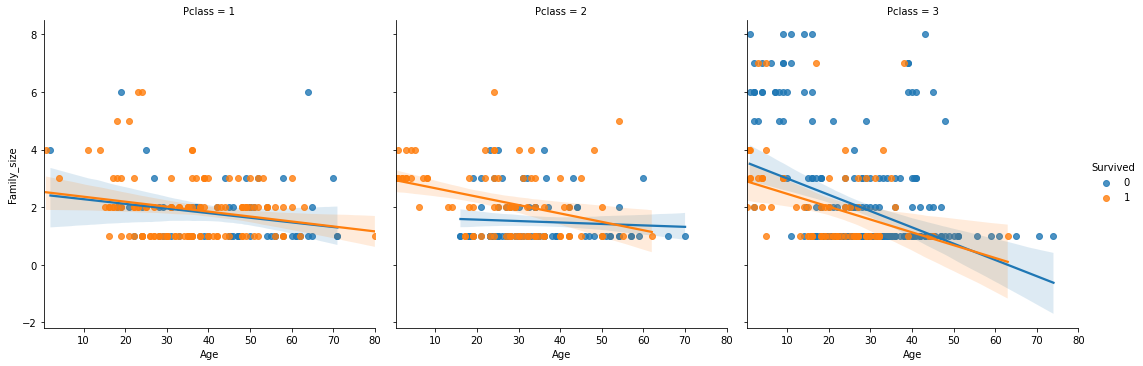

In [13]:
train["Family_size"] = train["SibSp"] + train["Parch"] + 1

sns.lmplot(x="Age", y="Family_size", hue="Survived", data=train, col="Pclass", col_wrap=3)

In [14]:
test["Family_size"] = test["SibSp"] + test["Parch"] + 1

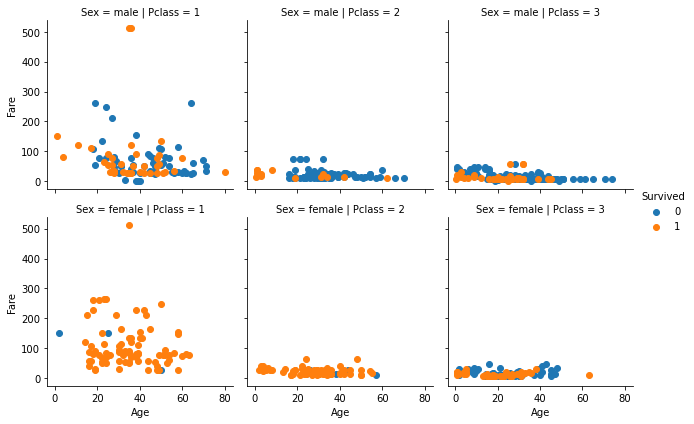

In [15]:
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train, col="Pclass", row="Sex", hue="Survived")
facet.map(plt.scatter, "Age", "Fare")
facet.add_legend()

C:\Users\HYUNJUN\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


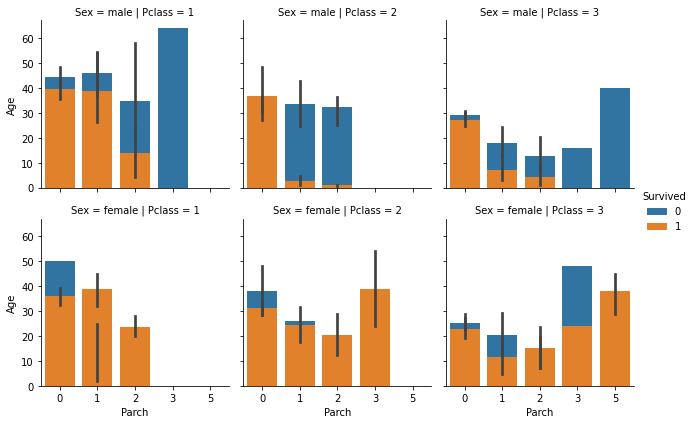

In [16]:
facet = sns.FacetGrid(train, col="Pclass", row="Sex", hue="Survived")
facet.map(sns.barplot, "Parch", "Age")
facet.add_legend()

In [17]:
# 남성 Pclass=1, Parch=3이상
train[(train["Pclass"] == 1) & (train["Parch"] >= 3) & (train["Sex"] == "male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,6


In [18]:
train[(train["Pclass"] == 1) & (train["Parch"] == 0) & (train["Sex"] == "male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,1
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,1
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1


In [19]:
# df 병합하기

all_df = pd.concat([train, test], join="inner")
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Family_size  1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [20]:
# 결측치 처리 (Fare, Embarked)

all_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Family_size       0
dtype: int64

In [21]:
all_df[all_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


In [22]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = all_df["Fare"].mean()

In [23]:
all_df["Fare"].isnull().sum()

0

In [24]:
all_df["Embarked"] = all_df["Embarked"].fillna("S")
all_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Family_size       0
dtype: int64

In [25]:
all_df["Title"] = all_df["Name"].str.extract('([A-Za-z]+)\.', expand=False)
all_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [26]:
all_df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Capt          1
Lady          1
Sir           1
Don           1
Mme           1
Jonkheer      1
Dona          1
Countess      1
Name: Title, dtype: int64

In [27]:
all_df["Title"] = all_df["Title"].replace(["Dr","Rev","Col","Lady","Sir","Jonkheer","Countess","Don","Capt","Dona", "Major"], "Rare")
all_df["Title"] = all_df["Title"].replace("Ms", "Miss")
all_df["Title"] = all_df["Title"].replace("Mlle", "Miss")
all_df["Title"] = all_df["Title"].replace("Mme", "Mrs")
all_df["Title"].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [28]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

all_df["Title"]= all_df["Title"].map(title_mapping)
all_df["Title"] = all_df["Title"].fillna(0)
all_df["Title"].isna().sum()

0

In [29]:
all_df.loc[all_df["Cabin"].isna(), "Cabin_bool"] = 1
all_df.loc[all_df["Cabin"].notna(), "Cabin_bool"] = 0
all_df["Cabin_bool"] = all_df["Cabin_bool"].astype(int)

In [30]:
all_df["Fare_qcut"] = pd.qcut(all_df["Fare"], 5, labels=False)

In [31]:
# label encoding
# Sex, Title, Embarked

sex_dict = {"male":0, "female":1}
all_df["Sex"] = all_df["Sex"].map(sex_dict)

all_df["Embarked"] = all_df["Embarked"].map({"S":1, "C":2, "Q":3})

In [32]:
all_df.loc[all_df["Cabin"].isna(), "Cabin"] = "Z"
all_df.loc[all_df["Cabin"].notna(), "Cabin_First"] = all_df["Cabin"].str.slice(0,1)
all_df["Cabin_First"].value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_First, dtype: int64

<AxesSubplot:ylabel='Cabin_First'>

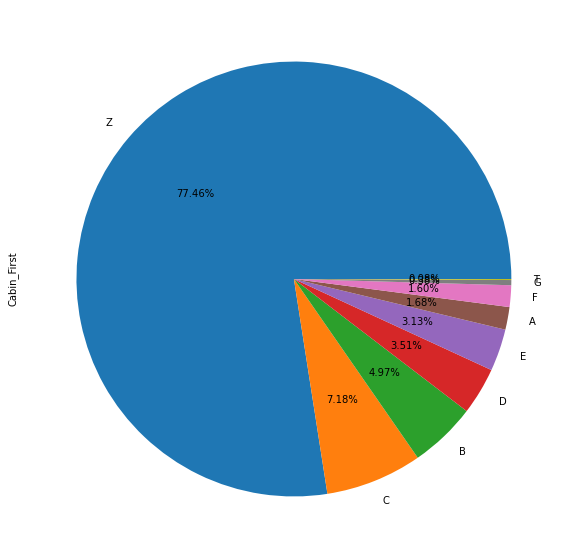

In [33]:
tmp = all_df["Cabin_First"].value_counts()
tmp.plot(kind="pie", autopct="%1.2f%%", figsize=(15, 10))

In [34]:
all_df["Cabin_First"] = all_df["Cabin_First"].replace(["G", "T"], "Rare")

cabin_First_dict = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "Z":6, "Rare":7}
all_df["Cabin_First"] = all_df["Cabin_First"].map(cabin_First_dict)
# all_df["Cabin_First"] = all_df["Cabin_First"].astype(int)
all_df["Cabin_First"].value_counts()

6    1014
2      94
1      65
3      46
4      41
0      22
5      21
7       6
Name: Cabin_First, dtype: int64

In [35]:
# 그룹객체로 가져온 데이터의 인덱스는 기준을 삼은 컬럼의 데이터 명으로 정해진다!!!!! ex) 1,2,3,4,5

mean_group_age = all_df.groupby("Title")["Age"].mean()
print(mean_group_age)

Title
1    32.252151
2    21.824366
3    36.918129
4     5.482642
5    45.178571
Name: Age, dtype: float64


In [36]:
mean_group_age[1] # [0]을 찍으면 인덱스 0번이 없기 때문에 값을 불러올 수 없다!!!!!

32.25215146299484

In [37]:
all_df.loc[(all_df["Age"].isna()) & (all_df["Title"] == 1), "Age"] = mean_group_age[1]
all_df.loc[(all_df["Age"].isna()) & (all_df["Title"] == 2), "Age"] = mean_group_age[2]
all_df.loc[(all_df["Age"].isna()) & (all_df["Title"] == 3), "Age"] = mean_group_age[3]
all_df.loc[(all_df["Age"].isna()) & (all_df["Title"] == 4), "Age"] = mean_group_age[4]
all_df.loc[(all_df["Age"].isna()) & (all_df["Title"] == 5), "Age"] = mean_group_age[5]

In [38]:
train.shape, test.shape, all_df.shape

((891, 13), (418, 12), (1309, 16))

In [39]:
train_df = all_df.iloc[:891, :]
test_df = all_df.iloc[891:, :]
train_df = pd.concat([train_df, train["Survived"]], axis=1)
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title,Cabin_bool,Fare_qcut,Cabin_First,Survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Z,1,2,1,1,0,6,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,2,3,0,4,2,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Z,1,1,2,1,1,6,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,2,3,0,4,2,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Z,1,1,1,1,1,6,0


In [40]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

X_train = train_df[["Pclass", "Age", "SibSp", "Parch", "Fare_qcut", "Family_size", "Title", "Cabin_bool",\
                    "Cabin_First"]]
y_train = train_df["Survived"]
X_test = test_df[["Pclass", "Age", "SibSp", "Parch", "Fare_qcut", "Family_size", "Title", "Cabin_bool",\
                    "Cabin_First"]]

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
y_pred[: 15]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [41]:
# score = 0.69617
submission_file = pd.read_csv("../data/gender_submission.csv")
submission_file["Survived"] = y_pred
submission_file.to_csv("decision_tree_model_submission.csv", index=False)

In [42]:
selected_features = ["Pclass", "Family_size", "Title", "Cabin_bool", "Sex"]

X_train = train_df[selected_features]
y_train = train_df["Survived"]
X_test = test_df[selected_features]

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
y_pred[: 15]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [43]:
# score = 0.76315
submission_file = pd.read_csv("../data/gender_submission.csv")
submission_file["Survived"] = y_pred
submission_file.to_csv("decision_tree_model_submission2.csv", index=False)

In [44]:
def age_group(x):
    if x <= 10:
        return "Child"
    elif 10 < x <= 20:
        return "Teenager"
    elif 21 < x <= 30:
        return "Young Adult"
    elif 31 < x <= 50:
        return "Adult"
    else:
        return "Elder"

all_df["Age_group"] = all_df["Age"].apply(lambda x: age_group(x))

In [45]:
age_dummies = pd.get_dummies(all_df["Age_group"])
all_df = pd.concat([all_df, age_dummies], axis=1)

In [46]:
train_df = all_df.iloc[:891, :]
test_df = all_df.iloc[891:, :]
train_df = pd.concat([train_df, train["Survived"]], axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title,Cabin_bool,Fare_qcut,Cabin_First,Age_group,Adult,Child,Elder,Teenager,Young Adult
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,Z,...,1,1,0,6,Adult,1,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,Z,...,3,1,0,6,Adult,1,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,Z,...,1,1,1,6,Elder,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,Z,...,1,1,1,6,Young Adult,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,Z,...,3,1,2,6,Young Adult,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,32.252151,0,0,A.5. 3236,8.0500,Z,...,1,1,1,6,Adult,1,0,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,...,5,0,4,2,Adult,1,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Z,...,1,1,0,6,Adult,1,0,0,0,0
416,1308,3,"Ware, Mr. Frederick",0,32.252151,0,0,359309,8.0500,Z,...,1,1,1,6,Adult,1,0,0,0,0


In [47]:
from sklearn.ensemble import RandomForestClassifier

selected_features = ["Pclass", "Family_size", "Title", "Cabin_bool", "Sex", "Embarked", "Age", "Fare_qcut"]

X_train = train_df[selected_features]
y_train = train_df["Survived"]
X_test = test_df[selected_features]


rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred[: 15]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [48]:
# score = 0.74880
submission_file = pd.read_csv("../data/gender_submission.csv")
submission_file["Survived"] = y_pred
submission_file.to_csv("random_forest_model_submission3.csv", index=False)

In [49]:
selected_features = ["Pclass", "Family_size", "Title", "Cabin_bool", "Sex", "Age"]

X_train = train_df[selected_features]
y_train = train_df["Survived"]
X_test = test_df[selected_features]

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred[: 15]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [50]:
# score = 0.71770
submission_file = pd.read_csv("../data/gender_submission.csv")
submission_file["Survived"] = y_pred
submission_file.to_csv("random_forest_model_submission4.csv", index=False)

In [53]:
selected_features = ["Pclass", "Family_size", "Title", "Cabin_bool", "Sex", "Embarked", "Fare_qcut", "Child", "Teenager", "Young Adult", "Elder", "Adult"]

X_train = train_df[selected_features]
y_train = train_df["Survived"]
X_test = test_df[selected_features]


rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred[: 15]

# score = 0.75119
submission_file = pd.read_csv("../data/gender_submission.csv")
submission_file["Survived"] = y_pred
submission_file.to_csv("random_forest_model_submission5.csv", index=False)